In [6]:
!pip install tensorflow opencv-python matplotlib

In [7]:
!pip list

Package                      Version
---------------------------- --------------
absl-py                      2.1.0
anyio                        4.6.2.post1
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        24.2.0
babel                        2.16.0
beautifulsoup4               4.12.3
bleach                       6.2.0
blinker                      1.8.2
cachetools                   5.5.2
certifi                      2024.8.30
cffi                         1.17.1
charset-normalizer           3.3.2
click                        8.1.7
colorama                     0.4.6
comm                         0.2.2
comtypes                     1.4.7
contourpy                    1.3.0
cycler                       0.12.1
debugpy                      1.8.8
decorator                    5.1.1
defusedxml                 

In [16]:
!pip install Pillow

In [1]:
import tensorflow as tf
import os

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
len(gpus)

0

In [3]:
cpus = tf.config.experimental.list_physical_devices('CPU')
len(cpus)

1

In [4]:
import cv2

In [5]:
data_dir = 'data'

In [6]:
os.listdir(data_dir)

['.ipynb_checkpoints', 'happy', 'sad']

In [7]:
os.listdir(os.path.join(data_dir,'happy'))

['.ipynb_checkpoints',
 '05-12-21-happy-people.jpg',
 '1000_F_368578981_Re3aWHJGbJUTX8ytC6bswKqedruOVuDn.jpg',
 '1000_F_618001200_Rs4gohOCHN8obgHmY40SGhEbhJn86o7J.jpg',
 '1000_F_874149080_IDDdl8SHIfTGp6aqEWZBnCPI1UwLU1vO.jpg',
 '10563227-happy-person.jpg',
 '12-Things-a-Happy-Person-Does-Without-Realizing-It.jpg',
 '1200px-Smiley-svg.png',
 '160-1600378_transparent-happy-person-png-happy-man-face-png.png',
 '170404-happy-workers-feature.jpg',
 '29917610-beautiful-and-happy-man-smiling-with-thumbs-up.jpg',
 '31418025-diverse-happy-people.jpg',
 '343515-worldhappinessreport1440.jpg',
 '35438_hd.jpg',
 '360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg',
 '360_F_498729118_RiwWjhYDF4LgfnfEL0WCh6Ls4oh0cHPV.jpg',
 '360_F_553721043_dud5E2xUoiQaOEfJ4fLGgp7ZuQ7lsWKM.jpg',
 '360_F_569818893_ph01fzGNwgIBf0pzcwyJ3IwsRzQTpmpN.jpg',
 '383627315.jpg',
 '4-things-happy-people-dont-do-cover.png',
 '4239f3d51d092f69d529f372a37b4601-1024x341.jpg',
 '4239f3d51d092f69d529f372a37b4601.jpg',
 '427394C2000

In [8]:
image_exts = ['jpeg','jpg','bmp','png']

In [9]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [10]:
from PIL import Image

In [11]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
      image_path = os.path.join(data_dir,image_class,image)
      try:
        img = cv2.imread(image_path)
        tip=Image.open(image_path).format.lower()
        if tip not in image_exts:
            print('Image not in ext list {}'.format(image_path))
            os.remove(image_path)
      except Exception as e:
        print('Issue with image {}'.format(image_path))

Issue with image data\happy\.ipynb_checkpoints
Issue with image data\sad\.ipynb_checkpoints


In [12]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [13]:
import numpy as np
from matplotlib import pyplot as plt

In [14]:
data= tf.keras.utils.image_dataset_from_directory('data')

Found 215 files belonging to 2 classes.


In [15]:
data_iterator= data.as_numpy_iterator()

In [27]:
batch = data_iterator.next()

In [31]:
# this is the image
batch[0].shape

(32, 256, 256, 3)

In [32]:
#this is the label
# 0 is happy people
# 1 is sad people
batch[1]

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0], dtype=int32)

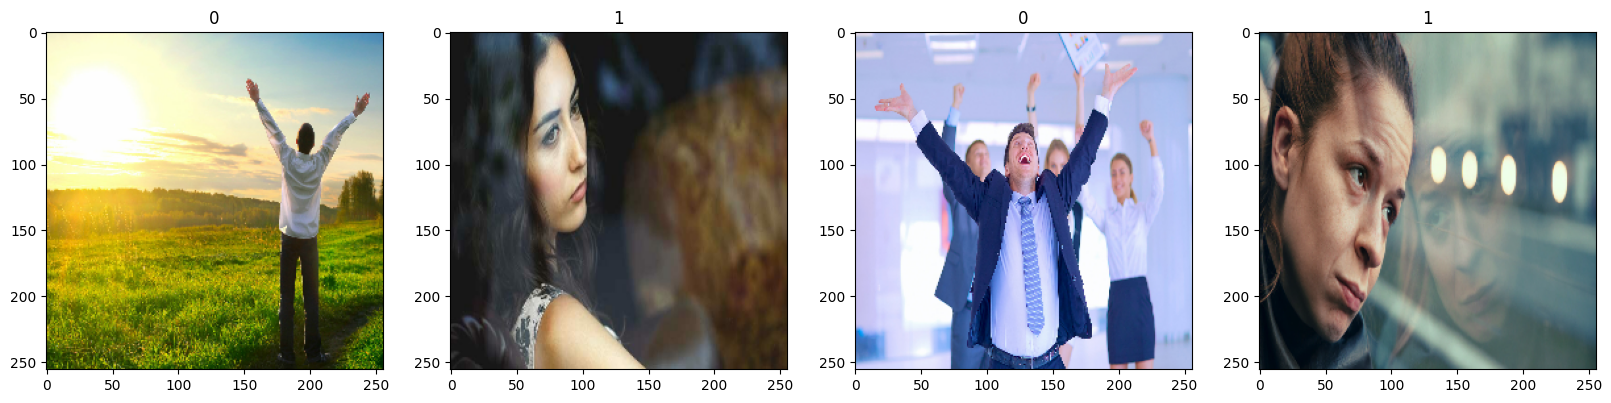

In [33]:
fig,ax= plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [34]:
data = data.map(lambda x,y: (x/255,y))

In [42]:
data.as_numpy_iterator().next()[0].max()

np.float32(1.0)

In [43]:
len(data)

7